In [19]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import camelot

In [42]:
Y_MAX = 260

In [20]:
data = pd.read_csv("./data/data_corona_varianten.txt",
            infer_datetime_format=True,
            delimiter=" ")

In [21]:
pd.to_datetime(data.Timestamp, infer_datetime_format=True)

0   2021-08-02 16:00:00
1   2021-09-02 16:00:00
2   2021-10-02 16:00:00
Name: Timestamp, dtype: datetime64[ns]

In [22]:
data

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
0,"08.02.2021,16:00",51,106,151,179,181,210,106,43,41,13
1,"09.02.2021,16:00",56,117,178,206,206,244,127,50,45,17
2,"10.02.2021,16:00",61,127,191,202,213,236,119,43,30,10


In [23]:
data.keys()

Index(['Timestamp', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90+'],
      dtype='object')

In [24]:
age_groups = data.keys()[1:]

In [25]:
age_groups

Index(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80-89', '90+'],
      dtype='object')

In [26]:
data['sum']=data.sum(axis=1)

plot der tages-Daten

In [27]:
data['sum'][1]

1246

0


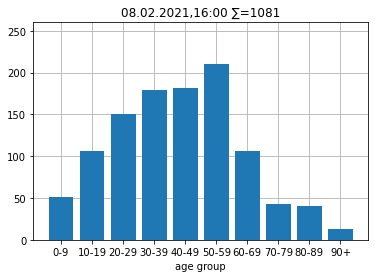

1


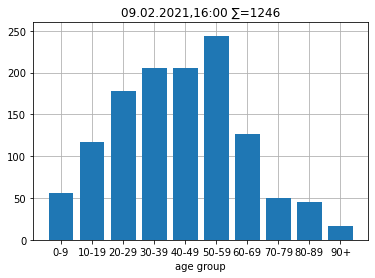

2


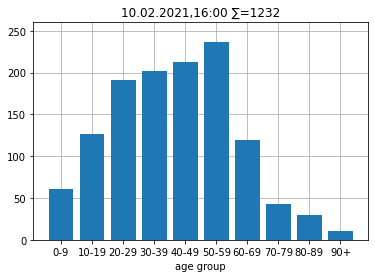

In [43]:
for i in range(data.index[-1]+1):
    print(i)
    cur_height = np.array(data.loc[i][age_groups])
    plt.bar(age_groups, 
            height=cur_height,
           zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(0.,Y_MAX)
    plt.title(data.loc[i][0] + f" ∑={data['sum'][i]}")
    plt.show()
    plt.close()

Plot des Zuwachses

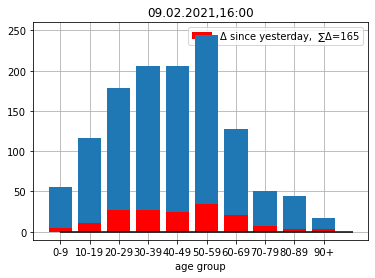

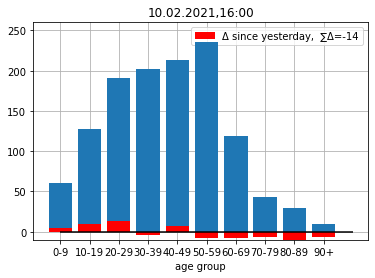

In [59]:
for i in np.arange(start=1, stop=data.index[-1]+1):
    # print(i)
    cur_height = np.array(data.loc[i][age_groups])
    # print(cur_height)
    prev_height = np.array(data.loc[i-1][age_groups])
    # print(prev_height)
    Δ = cur_height - prev_height
    # print(bottom)
    sum_delta = Δ.sum()

    
    # plot current height
    plt.bar(age_groups, 
            height=cur_height,
           zorder=995)
    # plot change since last time
    plt.bar(age_groups, 
            height=Δ,
            bottom=0,
            color='red',
           zorder=998,
           label=f"Δ since yesterday,  ∑Δ={Δ.sum()}")
    plt.hlines(0,0,10,  colors='k', zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(-10.,Y_MAX)
    plt.title(data.loc[i][0])
    plt.legend(loc='best')
    plt.show()
    plt.close()

read from PDF

In [3]:
pdfobject=open('210208_COVID_Tagesbericht_LGA.pdf','rb')

In [7]:
pdf=pypdf.PdfFileReader(pdfobject)

In [15]:
pdf.pages

In [7]:
tables = camelot.read_pdf('210208_COVID_Tagesbericht_LGA.pdf')

RuntimeError: Please make sure that Ghostscript is installed

In [ ]:
!gs

GPL Ghostscript 9.22 (2017-10-04)
Copyright (C) 2017 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
GS>